<a href="https://colab.research.google.com/github/DT22179/Telecom-Churn-Analysis/blob/main/Telecom_Churn_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Orange S.A., formerly France Télécom S.A., is a French multinational telecommunications corporation. The Orange Telecom's Churn Dataset, consists of cleaned customer activity data (features), along with a churn label specifying whether a customer canceled the subscription.

## <b> Explore and analyze the data to discover key factors responsible for customer churn and come up with ways/recommendations to ensure customer retention. </b>

# Business Problem
## To Explore and analyze the data provided by Orange S.A., to discover key factors responsible for customer churn and suggest ways to ensure customer retention.

## Business Metric - Decrease % of customer churn rate (or increase the % of customer retention).





### Importing Required Libraries



In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importing Dataset from Google Drive

In [33]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Reading the dataset using pandas

In [34]:
tele_df = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Capstone Project/EDA/Telecom Churn.csv')

In [ ]:
## Let's explore the data
tele_df

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


#### So there are 3,333 rows and 20 columns(can say features)

In [ ]:
## Let's check column names
tele_df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

From the output of **tele_df.columns** we can observe that there are 19 independent feature and one dependent feature(also called target) which is **Churn**. The value of churn can be either **False** or **True** and it is dependent on rest of the features. So we've to examine how to decrease the churn rate of our customer's and increase the retention and for that we will need to explore all the possible relationship between features itself and also between features and target variable to get the solid insights about the data and business problem.

# Different Types Of Categories For Our Features
### Target Feature
* Churn (Bool type) Further we can convert it to int type with value 0 and 1 for False and True respectively. 
Note: Churn is a type of Categorical feature

### Numerical Feature

1. Account Length
2. Number Vmail Messages
3. Total Day Minutes
4. Total Day Calls
5. Total Day Charge
6. Total Eve Minutes
7. Total Eve Calls
8. Total Eve Charge
9. Total Night Minutes
10. Total Night Calls
11. Total Night Charge
12. Total Intl Minutes
12. Total Intl Calls
13. Total Intl Charge
14. Customer Services Call

### Categorical Feature

1. State
2. Area Code
3. International Plan
4. Voice Mail Plan






## Getting information and summary about a data.

In [ ]:
## Getting more information about the dataset
tele_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

We can see that there is no any ***NULL*** value present. 

In [ ]:
## Describing the dataset to get the statistical summary about the data
tele_df.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [ ]:
tele_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Account length,3333.0,101.064806,39.822106,1.00,74.00,101.00,127.00,243.00
Area code,3333.0,437.182418,42.371290,408.00,408.00,415.00,510.00,510.00
Number vmail messages,3333.0,8.099010,13.688365,0.00,0.00,0.00,20.00,51.00
Total day minutes,3333.0,179.775098,54.467389,0.00,143.70,179.40,216.40,350.80
Total day calls,3333.0,100.435644,20.069084,0.00,87.00,101.00,114.00,165.00
Total day charge,3333.0,30.562307,9.259435,0.00,24.43,30.50,36.79,59.64
Total eve minutes,3333.0,200.980348,50.713844,0.00,166.60,201.40,235.30,363.70
Total eve calls,3333.0,100.114311,19.922625,0.00,87.00,100.00,114.00,170.00
Total eve charge,3333.0,17.083540,4.310668,0.00,14.16,17.12,20.00,30.91
Total night minutes,3333.0,200.872037,50.573847,23.20,167.00,201.20,235.30,395.00


In [ ]:
## Chcking the number of churn rate 
tele_df['Churn'].value_counts()

False    2850
True      483
Name: Churn, dtype: int64

We have less number of churns(True). Let's further analyze to decraese it more

In [ ]:
## Now let us convert our Target feature variable(Churn) value to 1 and 0(1 for True and 0 for False). We do this for easy analysis and visualization.
tele_df['Churn'].replace({False: 0, True: 1}, inplace = True)

In [ ]:
tele_df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


## Basic Analysis & Visualization of Data

Churn Visualization using Catplot

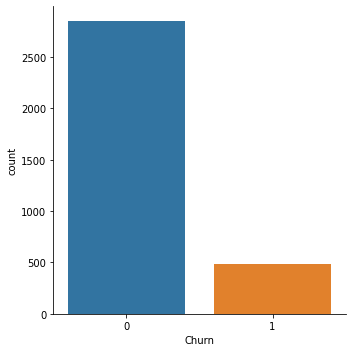

In [ ]:
sns.catplot(x = 'Churn', kind = 'count', data = tele_df)

Plotting how many customer's have International Plan using count plot

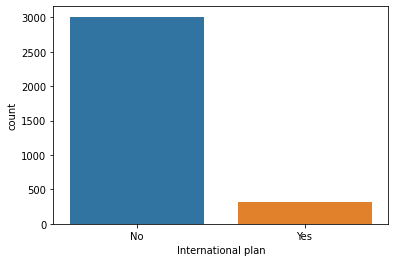

In [ ]:
sns.countplot(data = tele_df, x = 'International plan')

We can observe that there are not many customer's who opted for internationla plan. Now let's plot how many customer's have opted for voice mail plan.

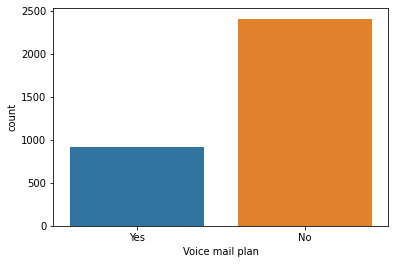

In [ ]:
sns.countplot(data = tele_df, x = 'Voice mail plan')

Approximately 30% of our customer's have opted for voice mail plan. Now let us plot number of customer service calls made by customer's

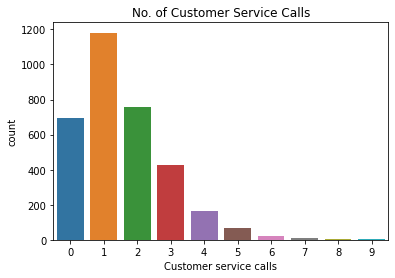

In [ ]:
sns.countplot(data= tele_df, x = 'Customer service calls')
plt.title("No. of Customer Service Calls")
plt.show()

We can observce that most number of customer's make between 0 to 3 calls to out customer service. No let us check and plot from which state most of our customer's belongs to.

In [ ]:
tele_df['State'].value_counts()

WV    106
MN     84
NY     83
AL     80
OR     78
WI     78
OH     78
VA     77
WY     77
CT     74
ID     73
VT     73
MI     73
TX     72
UT     72
IN     71
MD     70
KS     70
MT     68
NC     68
NJ     68
CO     66
WA     66
NV     66
MS     65
RI     65
MA     65
AZ     64
MO     63
FL     63
NM     62
ME     62
ND     62
OK     61
NE     61
DE     61
SC     60
SD     60
KY     59
IL     58
NH     56
AR     55
DC     54
GA     54
TN     53
HI     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: State, dtype: int64

In [ ]:
tele_df['State'].nunique()

51

In [ ]:
print(f"Most of our Customer's belongs to {tele_df['State'].max()} State")
print(f"Least of our Customer's belongs to {tele_df['State'].min()} State")

Most of our Customer's belongs to WY State
Least of our Customer's belongs to AK State


## Relationship Analysis
Let us now begin a fun part. We will check relationship between our  feature and target feature one by one. And will also check how it effects the Churn rate and what kind of relationship is between our feature and target variables. Also we will check what kind of relationship is there between our features.

**Let's make a new columns with name total_minutes(total call minutes for day, evening, night & Intl). And check which state contributes most number of call minutes.**

In [ ]:
tele_df['Total minutes'] = tele_df['Total day minutes'] + tele_df['Total eve minutes'] + tele_df['Total night minutes'] + tele_df['Total intl minutes']

In [ ]:
tele_df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Total minutes
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,717.2
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,625.2
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,539.4
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,564.8
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,512.0


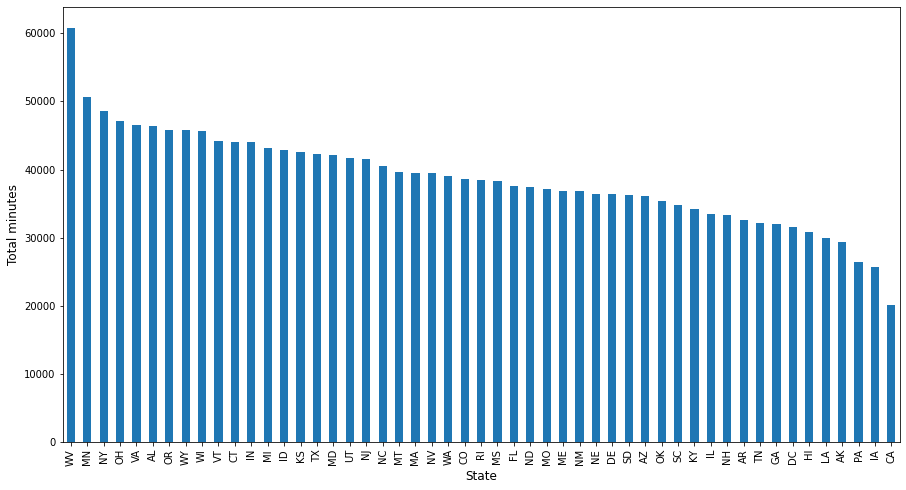

In [ ]:
## For checking which state have higher number of minutes we will groupby 'State' column w.r.t 'Total minutes' columns.
plt.figure(figsize=(15,8))
tele_df.groupby('State')['Total minutes'].sum().sort_values(ascending=False).plot(kind = 'bar')
plt.xlabel("State", size=12)
plt.ylabel("Total minutes", size=12)
plt.show()

In [ ]:
print(f"State with highest minutes of calls : {tele_df.groupby('State')['Total minutes'].sum().idxmax()}")
print(f"State with lowest minutes of calls : {tele_df.groupby('State')['Total minutes'].sum().idxmin()}")

State with highest minutes of calls : WV
State with lowest minutes of calls : CA


We can observe that state with highest number of customer's don't have highest minutes of calls and same for state with least number of customer's i.e, *AK* have higher minutes than other 3 States i.e, *PA, IA & CA*

**Cool, now let's compare which state have higher churn customers and also which state have higher churn rate(i.e highest % of churn rate)**

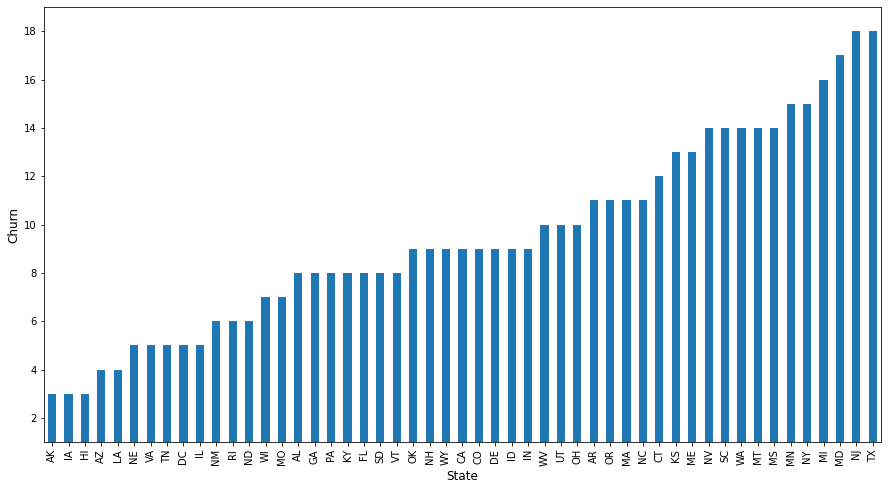

In [ ]:
plt.figure(figsize=(15,8))
tele_df.groupby('State')['Churn'].sum().sort_values(ascending=True).plot(kind='bar')
plt.xlabel("State", size=12)
plt.ylabel("Churn", size=12)
plt.ylim(1,19)
plt.show()

We can observce that TX has the highest number of Churns and AK is on the lowest side.

**Now let us check how Voice mail plan is impacting the churn**

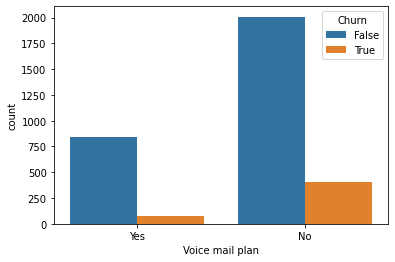

In [37]:
sns.countplot(x='Voice mail plan', hue='Churn', data=tele_df)

Let's check it numerically to get better insights.

In [38]:
pd.crosstab(tele_df['Voice mail plan'], tele_df['Churn'])

Churn,False,True
Voice mail plan,,
No,2008,403
Yes,842,80


In [42]:
pd.crosstab(tele_df['Voice mail plan'], tele_df['Churn'], normalize='index')

Churn,False,True
Voice mail plan,,
No,0.832849,0.167151
Yes,0.913232,0.086768


We can see that around 8% of the customer's churn for those who have opted for Voice mail plan and around 16% of the customer's churn for those who not opted for Voice mail plan.

**As we now know that *Voice mail plan* is impacting the churn rate of our customer's by approximately 8%. Let's check if *International plan* have impact on churn rate or not**

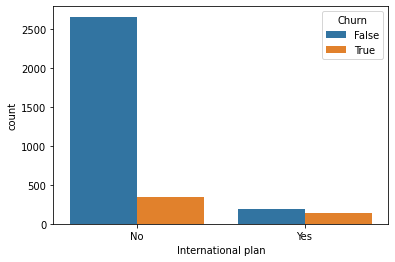

In [47]:
sns.countplot(x='International plan', hue='Churn', data=tele_df)

In [41]:
pd.crosstab(tele_df['International plan'], tele_df['Churn'])

Churn,False,True
International plan,,
No,2664,346
Yes,186,137


In [43]:
pd.crosstab(tele_df['International plan'], tele_df['Churn'], normalize='index')

Churn,False,True
International plan,,
No,0.885050,0.114950
Yes,0.575851,0.424149


Now that's a master stroke. We can see that, those customer who have International plan are more likely to go churn than those who don't. As 42% of those who have *International plan* have went churn and around 11% for those who didn't have *International Plan*

**Before moving further into more complex analysis among features themselves. Let us first check how Customer service calls is impacting a churn rate.**

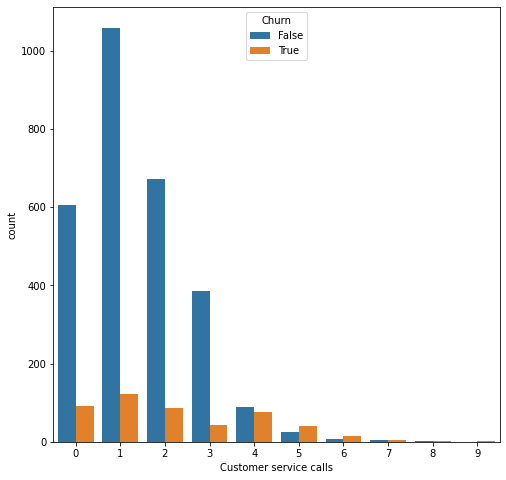

In [46]:
plt.figure(figsize=(8,8))
sns.countplot(x='Customer service calls', hue='Churn', data=tele_df)

Here we can clearly observe that those customer's who have called customer service for more than 3 time are more like to go churn than those who have called 3 or lesser number of times.

In [48]:
pd.crosstab(tele_df['Customer service calls'], tele_df['Churn'], normalize='index')

Churn,False,True
Customer service calls,,
0,0.868006,0.131994
1,0.896698,0.103302
2,0.885375,0.114625
3,0.897436,0.102564
4,0.542169,0.457831
5,0.393939,0.606061
6,0.363636,0.636364
7,0.444444,0.555556
8,0.500000,0.500000


The percentage of Churn have increased drastically from 4 to 9 Customer service calls. Let us check Whether Area Code have impact on Churn or not

In [51]:
tele_df['Area code'].value_counts()

415    1655
510     840
408     838
Name: Area code, dtype: int64

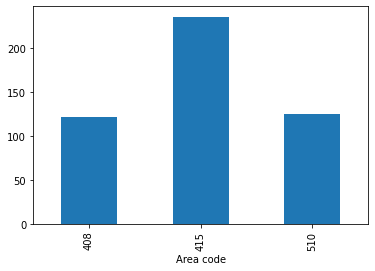

In [49]:
tele_df.groupby('Area code')['Churn'].sum().plot(kind='bar')

In [54]:
pd.crosstab(tele_df['Area code'], tele_df['Churn'])

Churn,False,True
Area code,,
408,716,122
415,1419,236
510,715,125


In [55]:
pd.crosstab(tele_df['Area code'], tele_df['Churn'], normalize='index')

Churn,False,True
Area code,,
408,0.854415,0.145585
415,0.857402,0.142598
510,0.851190,0.148810


Here we can observce that *Area code* alone do not have any impact on customer churn. As, percentage of churn(14%) is same for each and every *Area code*

**So untill now we have good amount of information on our data just by doing some basic to intermediate Data Analysis. Insights that we have gained till now includes -**
1. Most of our customer's does not opt for ***International plan*** and those who opt are more likely to go churn.
2. Around **16%** of our customer's are more likely to be go churn who have not opted for ***Voice mail plan*** & **8%** will go churn for those who have opted for a plan.
3. Customer's who call ***Customer service*** for **4** or more times are more likely to go churn then those who call **3** times or less then that.
4. TX State have a highest number of customer churn where as AK is the State with lowest number of customer churn.
5. ***Area code*** does not have any direct relatinship with customer churn, as churn rate is same for each and evry ***Area code***




